<a href="https://colab.research.google.com/github/cabrera21hub/colab_Proyect/blob/main/Prediccion_de_modelo_de_calidad_de_aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fecha    0
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM25     0
SO2      0
dtype: int64


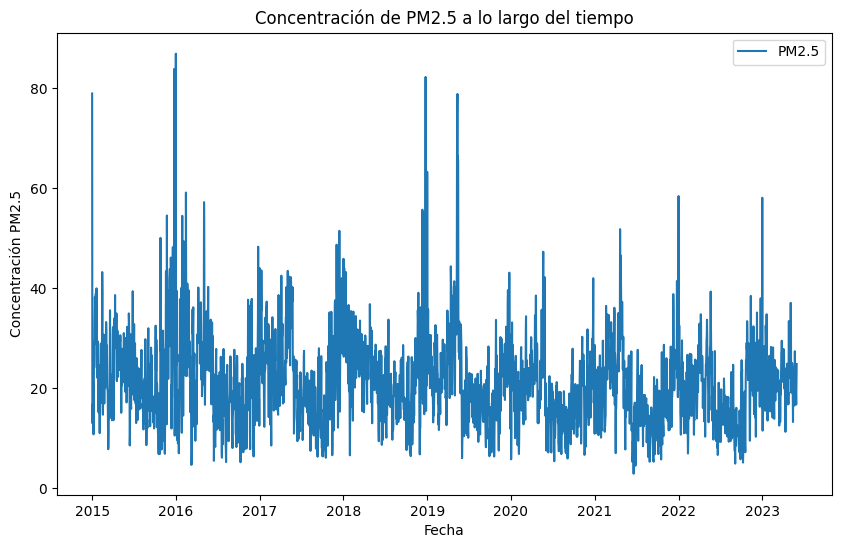

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('/content/rama_2023_05.csv')

# Convertir la columna 'fecha' a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Comprobar si hay valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos (opcional)
df = df.dropna()

# Análisis exploratorio (gráficos)
plt.figure(figsize=(10, 6))
plt.plot(df['fecha'], df['PM25'], label='PM2.5')
plt.xlabel('Fecha')
plt.ylabel('Concentración PM2.5')
plt.title('Concentración de PM2.5 a lo largo del tiempo')
plt.legend()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# Seleccionar características (X) y variable objetivo (y)
X = df[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'SO2']]
y = df['PM25']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Entrenar el modelo SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = svr.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'RMSE: {rmse}')


RMSE: 4.282760574681629


In [7]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de parámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Configurar Grid Search
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros
print(f'Mejores parámetros: {grid.best_params_}')

# Realizar predicciones con el mejor modelo
y_pred_optimized = grid.predict(X_test_scaled)

# Evaluar el modelo optimizado
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = mse_optimized ** 0.5
print(f'RMSE Optimizado: {rmse_optimized}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01

In [8]:
# Agregar nuevas características al DataFrame original (ejemplos)
df['NO2/NO'] = df['NO2'] / df['NO']
df['NOX/NO'] = df['NOX'] / df['NO']

# Actualizar X con las nuevas características
X = df[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'SO2', 'NO2/NO', 'NOX/NO']]

# Dividir y escalar los datos nuevamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar un modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
print(f'RMSE Random Forest: {rmse_rf}')


RMSE Random Forest: 3.7696078918309457


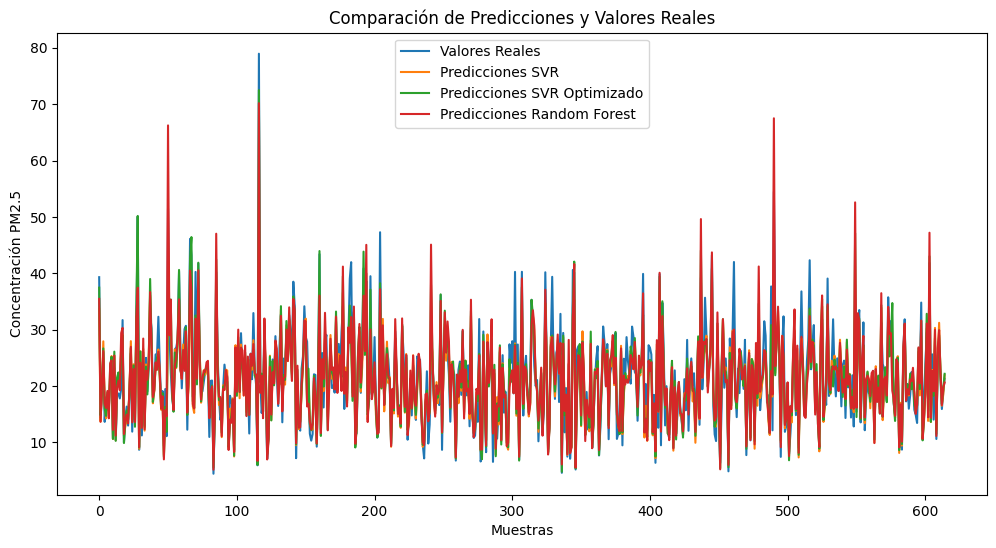

In [10]:
import matplotlib.pyplot as plt

# Comparar predicciones con los valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Valores Reales')
plt.plot(y_pred, label='Predicciones SVR')
plt.plot(y_pred_optimized, label='Predicciones SVR Optimizado')
plt.plot(y_pred_rf, label='Predicciones Random Forest')
plt.xlabel('Muestras')
plt.ylabel('Concentración PM2.5')
plt.title('Comparación de Predicciones y Valores Reales')
plt.legend()
plt.show()
